# Overview

`-` 제가 자주하는 데이터 분석의 단계

1. 데이터의 기본 정보 (`df.info` 등등)을 확인

2. 데이터를 tidy하게 바꾼 후 `EDA(탐색적 자료 분석)`, `통계 분석(t-test)` 등등 수행

3. tidy데이터를 바탕으로 모델링 수행

4. 결과 요약 및 해석 -> 결과에 대한 자료 작성 시에도 tidy한 데이터가 사용됨

`-` 금일 수업 요약

1. tidy 데이터의 정의

2. tidy 데이터를 활용하지 않은 시각화  (matplitlib)

3. tidy 데이터를 활용한 시각화 (seaborn, ggplot, plotly 등등...)

4. 심슨의 역설

# import

In [1]:
# pip install plotnine

In [1]:
# | code-fold : true
import pandas as pd 
import numpy as np 
#from plotnine import * 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook_connected"
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#  ex1) 남자, 여자, 키와 몸무게를 바탕으로 bmi 측정

$$\text {BMI} =  \frac {\text{몸무게}}{\text{키}^2}$$

## 데이터 생성 (`tidy : (x)`)

In [72]:
# | code-fold : true
male_w = np.random.randint(60,100,10000) + np.random.randn(10000)
female_w = np.random.randint(40,80,10000) + np.random.randn(10000)
male_h = (np.random.randint(160,200,10000) + np.random.randn(10000))/100
female_h = (np.random.randint(140,180,10000) + np.random.randn(10000))/100


bmi_m =  male_w/(male_h**2)
bmi_f =  female_w/(female_h**2)

bins = [-np.Inf, 18.5,23,25,np.Inf]
labels = ["저체중","정상","과체중","비만"]

df = pd.DataFrame([male_w,female_w,male_h,female_h,bmi_m,bmi_f]).T

df.columns = ["male_w","female_w","male_h","female_h","bmi_m","bmi_f"]


df["bmi_label_M"] = pd.cut(df.bmi_m, bins = bins, labels =labels)
df["bmi_label_F"] = pd.cut(df.bmi_f, bins = bins, labels =labels)


bins_m = [-np.Inf, 1.60,1.70,1.80,1.90,np.Inf]
labels = ["매우 작은키","작은키","보통","큰키","매우 큰키"]

bins_f = [-np.Inf, 1.40,1.50,1.60,1.70,np.Inf]


df["h_label_M"] = pd.cut(df.male_h, bins = bins_m, labels =labels)
df["h_label_F"] = pd.cut(df.female_h, bins = bins_f, labels =labels)


df.head()

male_w   female_w    male_h  female_h      bmi_m      bmi_f bmi_label_M  \
0  95.512228  77.760589  1.747844  1.555205  31.264669  32.150229          비만   
1  78.657688  65.837765  1.648885  1.572286  28.930805  26.632491          비만   
2  92.135422  41.169597  1.756829  1.611968  29.851614  15.843971          비만   
3  85.688058  55.415655  1.750162  1.560285  27.974579  22.762752          비만   
4  83.454618  43.582328  1.625592  1.502553  31.581097  19.304156          비만   

  bmi_label_F h_label_M h_label_F  
0          비만        보통        보통  
1          비만       작은키        보통  
2         저체중        보통        큰키  
3          정상        보통        보통  
4          정상       작은키        보통

## 시각화 1 (matplotlib, tidy x)

`-` 일단 남자와 여자의 BMI 지수를 비교하고 싶음

`-` 데이터 구조

In [35]:
df.head()

male_w   female_w    male_h  female_h      bmi_m      bmi_f bmi_label_M  \
0  69.401280  59.315255  1.625395  1.588538  26.269360  23.505598          비만   
1  96.582571  71.060495  1.754996  1.704732  31.357869  24.452105          비만   
2  64.515219  73.489190  1.891025  1.616301  18.041283  28.130585         저체중   
3  96.048789  56.877694  1.831055  1.723334  28.647643  19.151515          비만   
4  91.834611  69.049447  1.726567  1.726978  30.806303  23.151891          비만   

  bmi_label_F h_label_M h_label_F  
0         과체중       작은키        보통  
1         과체중        보통     매우 큰키  
2          비만        큰키        큰키  
3          정상        큰키     매우 큰키  
4         과체중        보통     매우 큰키

`-` 시각화

In [36]:
plt.figure(figsize=(12,4))
plt.plot(df.male_w,df.bmi_m,".",alpha=0.3)
plt.plot(df.female_w,df.bmi_f,".",alpha=0.3)
plt.legend(["남","여"])
plt.title("남자와 여자 몸무게에 따른 BMI")

Text(0.5, 1.0, '남자와 여자 몸무게에 따른 BMI')

## 시각화 2 (matplotlib.pyplot, tidy x, subplot)

Text(0.5, 1.0, '여자 몸무게에 따른 BMI')

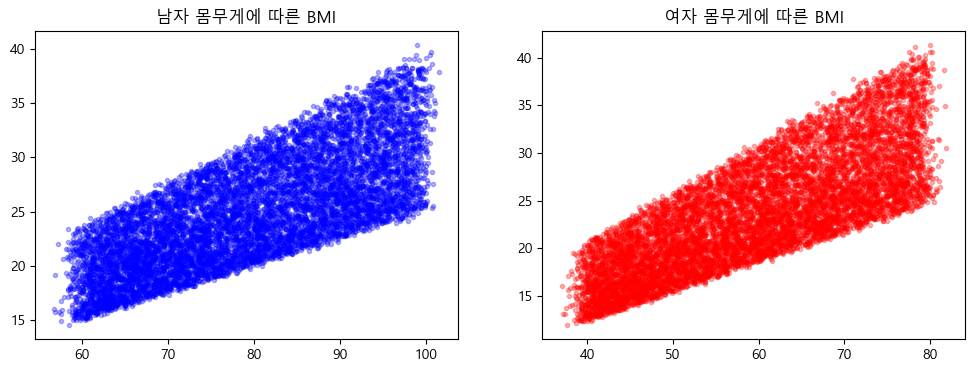

In [37]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

ax1,ax2 = axes

ax1.plot(df.male_w,df.bmi_m,".b",alpha=0.3)
ax1.set_title("남자 몸무게에 따른 BMI")
ax2.plot(df.female_w,df.bmi_f,".r",alpha=0.3)
ax2.set_title("여자 몸무게에 따른 BMI")

## 의문 1

`-` 아래의 데이터 구조를 살펴보자.

In [7]:
df.head()

male_w   female_w    male_h  female_h      bmi_m      bmi_f bmi_label_M  \
0  72.570505  53.415130  1.773998  1.671568  23.059717  19.116853         과체중   
1  93.896500  43.278004  1.883459  1.612035  26.468980  16.653995          비만   
2  82.263387  71.909528  1.607014  1.524727  31.854236  30.931608          비만   
3  99.802621  64.476794  1.871943  1.761914  28.481097  20.769874          비만   
4  78.356406  42.978916  1.658058  1.694691  28.501984  14.964927          비만   

  bmi_label_F h_label_M h_label_F  
0          정상        보통        큰키  
1         저체중        큰키        큰키  
2          비만       작은키        보통  
3          정상        큰키     매우 큰키  
4         저체중       작은키        큰키

`-` 분석가들에게 시각화 및 모델링 시 편한것

1. 한 컬럼에 모든 데이터의 대한 특정 수치(몸무게면 몸무게, 키면 키)가 있으면 좋겠음

2. 그리고 또 다른 컬럼에는 그것의 범주(성별, BmI수준)을 알려주는 컬럼이 있었으면 좋겠음

3. 이게 편한 이유? 시각화 수행 시 아래의  긴 코드를 한 줄로 쓸 수 있다!! $\to$ (지금은 남,녀 두 개의 범주지만, 범주의 수가 늘어나면 코드 라인 수도 늘어난다.)

```python
plt.figure(figsize=(12,4))
plt.plot(df.male_w,df.bmi_m,".",alpha=0.3)
plt.plot(df.female_w,df.bmi_f,".",alpha=0.3)
plt.legend(["남","여"])
plt.title("남자와 여자 몸무게에 따른 BMI")
```

4. 또한, 모델링 수행시 입력데이터는 tidy한 형태로 들어가기 때문이다.**(이미지, 텍스트 제외)**

## tidydata 만들기

## 1. 인데스를 ID로 변경

In [73]:
df.head()

male_w   female_w    male_h  female_h      bmi_m      bmi_f bmi_label_M  \
0  95.512228  77.760589  1.747844  1.555205  31.264669  32.150229          비만   
1  78.657688  65.837765  1.648885  1.572286  28.930805  26.632491          비만   
2  92.135422  41.169597  1.756829  1.611968  29.851614  15.843971          비만   
3  85.688058  55.415655  1.750162  1.560285  27.974579  22.762752          비만   
4  83.454618  43.582328  1.625592  1.502553  31.581097  19.304156          비만   

  bmi_label_F h_label_M h_label_F  
0          비만        보통        보통  
1          비만       작은키        보통  
2         저체중        보통        큰키  
3          정상        보통        보통  
4          정상       작은키        보통

In [74]:
df.reset_index(inplace=True)

In [75]:
df.head()

index     male_w   female_w    male_h  female_h      bmi_m      bmi_f  \
0      0  95.512228  77.760589  1.747844  1.555205  31.264669  32.150229   
1      1  78.657688  65.837765  1.648885  1.572286  28.930805  26.632491   
2      2  92.135422  41.169597  1.756829  1.611968  29.851614  15.843971   
3      3  85.688058  55.415655  1.750162  1.560285  27.974579  22.762752   
4      4  83.454618  43.582328  1.625592  1.502553  31.581097  19.304156   

  bmi_label_M bmi_label_F h_label_M h_label_F  
0          비만          비만        보통        보통  
1          비만          비만       작은키        보통  
2          비만         저체중        보통        큰키  
3          비만          정상        보통        보통  
4          비만          정상       작은키        보통

In [76]:
df.rename(columns={"index" : "ID" },inplace=True)

In [77]:
df.head()

ID     male_w   female_w    male_h  female_h      bmi_m      bmi_f  \
0   0  95.512228  77.760589  1.747844  1.555205  31.264669  32.150229   
1   1  78.657688  65.837765  1.648885  1.572286  28.930805  26.632491   
2   2  92.135422  41.169597  1.756829  1.611968  29.851614  15.843971   
3   3  85.688058  55.415655  1.750162  1.560285  27.974579  22.762752   
4   4  83.454618  43.582328  1.625592  1.502553  31.581097  19.304156   

  bmi_label_M bmi_label_F h_label_M h_label_F  
0          비만          비만        보통        보통  
1          비만          비만       작은키        보통  
2          비만         저체중        보통        큰키  
3          비만          정상        보통        보통  
4          비만          정상       작은키        보통

## 2. df.melt(weight) 테이블 생성

`-` 한 열에는 `셩별(sex)`, 다른 한 열에는 `무게(weight)`를 표시

In [84]:
df.loc[:,["ID","male_w","female_w"]].head(4)

ID     male_w   female_w
0   0  95.512228  77.760589
1   1  78.657688  65.837765
2   2  92.135422  41.169597
3   3  85.688058  55.415655

In [83]:
df.loc[:,["ID","male_w","female_w"]].\
        melt(id_vars=["ID"],
        value_vars = ["male_w","female_w"],
        var_name = "sex",value_name ="weight")

ID       sex     weight
0         0    male_w  95.512228
1         1    male_w  78.657688
2         2    male_w  92.135422
3         3    male_w  85.688058
4         4    male_w  83.454618
...     ...       ...        ...
19995  9995  female_w  72.715375
19996  9996  female_w  78.467711
19997  9997  female_w  67.947894
19998  9998  female_w  51.354418
19999  9999  female_w  48.809833

[20000 rows x 3 columns]

In [46]:
weight = df.melt(id_vars=["ID"],
            value_vars=["male_w","female_w"],
            var_name = "sex",value_name='weight')

weight.sex = weight.sex.replace("male_w","m").replace("female_w","f")
weight.head()

ID sex     weight
0   0   m  69.401280
1   1   m  96.582571
2   2   m  64.515219
3   3   m  96.048789
4   4   m  91.834611

### 생성한 테이블을 다시 돌릴려면?

In [52]:
_t = weight.pivot(index="ID",columns = "sex", values = "weight").head()
_t.columns = ["male_w","male_f"]
_t.reset_index()

ID     male_w     male_f
0   0  59.315255  69.401280
1   1  71.060495  96.582571
2   2  73.489190  64.515219
3   3  56.877694  96.048789
4   4  69.049447  91.834611

## 3. df.melt(BMI) 테이블 생성

In [53]:
bmi = df.melt(id_vars=["ID"],
            value_vars=["bmi_f","bmi_m"],
            var_name = "sex",value_name='bmi')

bmi.sex = bmi.sex.replace("bmi_m","m").replace("bmi_f","f")
bmi.head()

ID sex        bmi
0   0   f  23.505598
1   1   f  24.452105
2   2   f  28.130585
3   3   f  19.151515
4   4   f  23.151891

## 4. weight 테이블과 bmi 테이블 조인

In [54]:
df1 = pd.merge(weight,bmi, 
         left_on=['ID','sex'], right_on=['ID','sex'])

In [55]:
df1.head()

ID sex     weight        bmi
0   0   m  69.401280  26.269360
1   1   m  96.582571  31.357869
2   2   m  64.515219  18.041283
3   3   m  96.048789  28.647643
4   4   m  91.834611  30.806303

## 5. 시각화 3(plotly,`tidy (o)`)

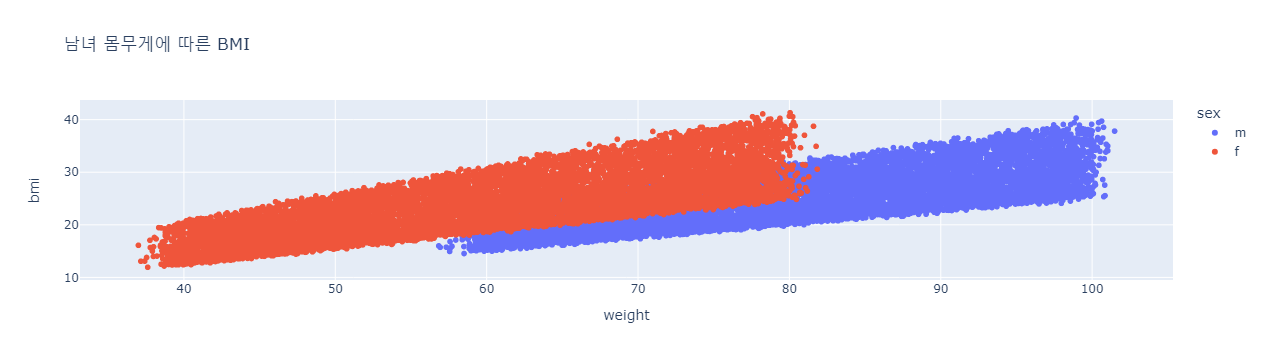

In [56]:
df1.plot(x="weight", y= "bmi",backend="plotly",kind="scatter",
                color= "sex", title= "남녀 몸무게에 따른 BMI")

## 6. 시각화 4(plotly,`tidy (o)`)

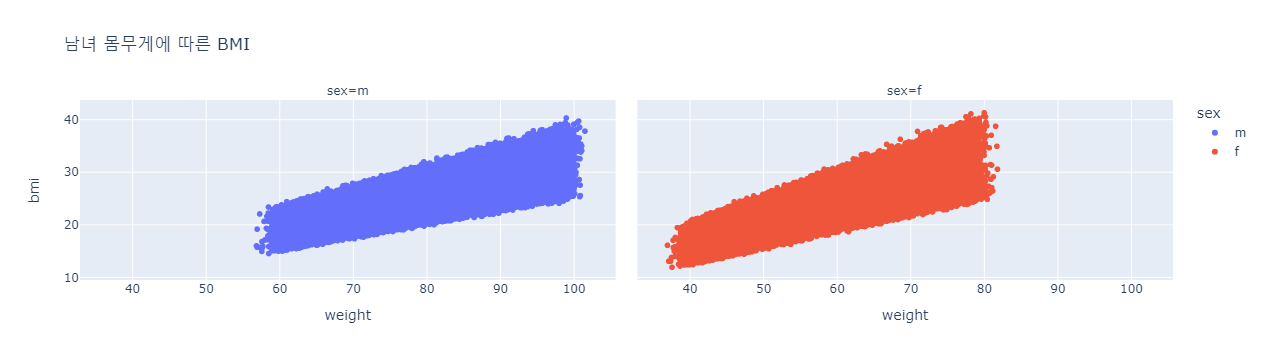

In [57]:
df1.plot(x="weight", y= "bmi",backend="plotly",kind="scatter",
                color= "sex", title= "남녀 몸무게에 따른 BMI",facet_col=df1.sex)

## 7. 데이터 비교

`1` tidy (x)

In [59]:
df.iloc[:,[0,1,2,5,6]].head()

ID     male_w   female_w      bmi_m      bmi_f
0   0  69.401280  59.315255  26.269360  23.505598
1   1  96.582571  71.060495  31.357869  24.452105
2   2  64.515219  73.489190  18.041283  28.130585
3   3  96.048789  56.877694  28.647643  19.151515
4   4  91.834611  69.049447  30.806303  23.151891

`2` tidy (o)

In [60]:
df1.head()

ID sex     weight        bmi
0   0   m  69.401280  26.269360
1   1   m  96.582571  31.357869
2   2   m  64.515219  18.041283
3   3   m  96.048789  28.647643
4   4   m  91.834611  30.806303

## 8. 코드 비교

`1` tidy(x)

```python
plt.figure(figsize=(12,4))
plt.plot(df.male_w,df.bmi_m,".",alpha=0.3)
plt.plot(df.female_w,df.bmi_f,".",alpha=0.3)
plt.legend(["남","여"])
plt.title("남자와 여자 몸무게에 따른 BMI")
```

```python
fig, axes = plt.subplots(1,2,figsize=(12,4))
ax1,ax2 = axes
ax1.plot(df.male_w,df.bmi_m,".b",alpha=0.3)
ax1.set_title("남자 몸무게에 따른 BMI")
ax2.plot(df.female_w,df.bmi_f,".r",alpha=0.3)
ax2.set_title("여자 몸무게에 따른 BMI")
```

`2` tidy (o)

```python
df1.plot(x="weight", y= "bmi",backend="plotly",kind="scatter",
                color= "sex", title= "남녀 몸무게에 따른 BMI")
```

```python
df1.plot(x="weight", y= "bmi",backend="plotly",kind="scatter",
                color= "sex", title= "남녀 몸무게에 따른 BMI",facet_col=df1.sex)
```

***

## 9. 다차원 plot (+height label)

In [61]:
df.head()

ID     male_w   female_w    male_h  female_h      bmi_m      bmi_f  \
0   0  69.401280  59.315255  1.625395  1.588538  26.269360  23.505598   
1   1  96.582571  71.060495  1.754996  1.704732  31.357869  24.452105   
2   2  64.515219  73.489190  1.891025  1.616301  18.041283  28.130585   
3   3  96.048789  56.877694  1.831055  1.723334  28.647643  19.151515   
4   4  91.834611  69.049447  1.726567  1.726978  30.806303  23.151891   

  bmi_label_M bmi_label_F h_label_M h_label_F  
0          비만         과체중       작은키        보통  
1          비만         과체중        보통     매우 큰키  
2         저체중          비만        큰키        큰키  
3          비만          정상        큰키     매우 큰키  
4          비만         과체중        보통     매우 큰키

In [62]:
h = df.melt(id_vars=["ID"],
            value_vars=["h_label_M","h_label_F"],
            var_name = "sex",value_name='h')

h.sex = h.sex.replace("h_label_M","m").replace("h_label_F","f")
h.head()

ID sex    h
0   0   m  작은키
1   1   m   보통
2   2   m   큰키
3   3   m   큰키
4   4   m   보통

In [63]:
df2 = pd.merge(df1,h, 
         left_on=['ID','sex'], right_on=['ID','sex'])

In [64]:
df2.head()

ID sex     weight        bmi    h
0   0   m  69.401280  26.269360  작은키
1   1   m  96.582571  31.357869   보통
2   2   m  64.515219  18.041283   큰키
3   3   m  96.048789  28.647643   큰키
4   4   m  91.834611  30.806303   보통

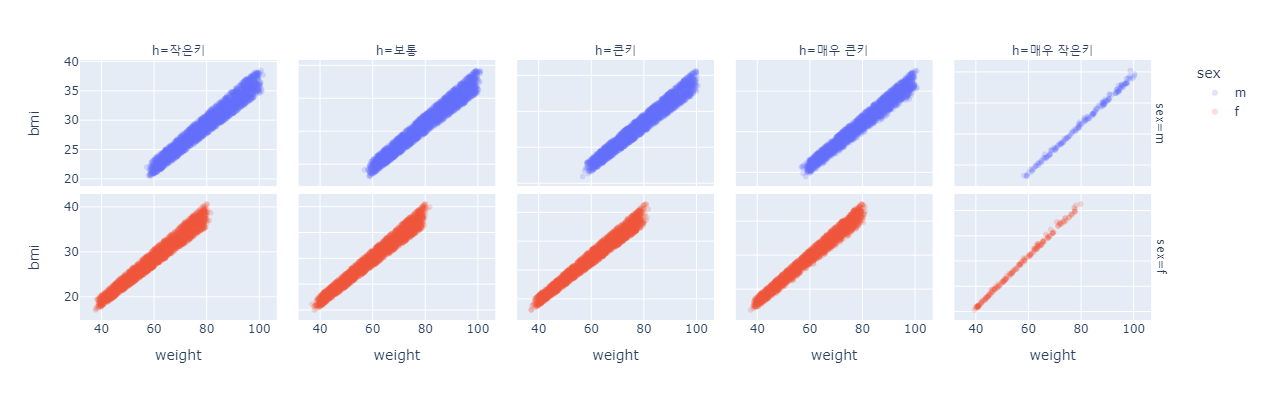

In [65]:
fig = df2.plot(x="weight",y="bmi",color="sex",facet_col = "h",
             facet_row="sex",kind= "scatter",backend = "plotly",height=400, width=1000,opacity=0.2)

fig.update_yaxes(matches=None)
fig.show()

## summary 및 개인적인 생각

`1`. 물론 데이터를 처음 로드하고 탐색하기 위해 `matplotlib`를 이용하여 untidy한 데이터를 살펴본다.

`2`. 그러나 후에 분석을 하고 그 결과를 시각화할 때는 tidy하지 못한 데이터로 할때 예쁜 그래프를 그리기 어렵다...(**이건 개인적인 생각**)

`3`. 그리고 데이터를 3,4개의 차원(기준)에 따라 그래프를 그릴 때 `untidy`한 데이터로 어떻게 그릴지 접근조차 어렵다.(**물론 가능한 분도 계시겠지만 거기까지 생각하고 싶지 않다.**)

`4`. 또한, 모델링 수행 수행시 tidy한 데이터가 들어가기 때문에 `melt,groupby` 등을 이용한 전처리는 필수적으로 갖추어야될 역량임.

`5`. 이 부분은 스터디원 분들이 너무 겁먹지 않으셨으면 좋겠다. 하기 싫어도 매번 해야되서 언젠가 몸이 기억하고 반응할 거다.

***

# 심슨의 역설

## ex2) 전북대학교의 합격률 $\to$ 남녀 불평등?

### 시각화 1 : 남녀 전체 합격률 비율 시각화

`-` 아래와 같은 대학합격률 데이터가 있다고 하자.

* DEP : 학과

* STATE : 합격 여부

* GEN : 성별

* COUNT : 빈도

In [66]:
#| code-fold : true
DEP=(['A1']*2+['A2']*2+['B1']*2+['B2']*2)*2 
GEN=['M']*8+['F']*8
STATE=['PASS','FAIL']*8
COUNT=[1,9,2,8,80,20,85,15,5,5,5,5,9,1,9,1]

df=pd.DataFrame({'DEP':DEP,'STATE':STATE,'GEN':GEN,'COUNT':COUNT})
df

DEP STATE GEN  COUNT
0   A1  PASS   M      1
1   A1  FAIL   M      9
2   A2  PASS   M      2
3   A2  FAIL   M      8
4   B1  PASS   M     80
5   B1  FAIL   M     20
6   B2  PASS   M     85
7   B2  FAIL   M     15
8   A1  PASS   F      5
9   A1  FAIL   F      5
10  A2  PASS   F      5
11  A2  FAIL   F      5
12  B1  PASS   F      9
13  B1  FAIL   F      1
14  B2  PASS   F      9
15  B2  FAIL   F      1

In [67]:
#| code-fold : true
t_g_c = df.groupby(["GEN","STATE"],as_index=False)[["COUNT"]].sum().\
            rename(columns = {"COUNY" : "sum"})
gs = t_g_c.groupby("GEN")["COUNT"].sum()
gs = list(np.repeat(gs,2))
t_g_c["prop"] = t_g_c["COUNT"]/gs
t_g_c

GEN STATE  COUNT      prop
0   F  FAIL     12  0.300000
1   F  PASS     28  0.700000
2   M  FAIL     52  0.236364
3   M  PASS    168  0.763636

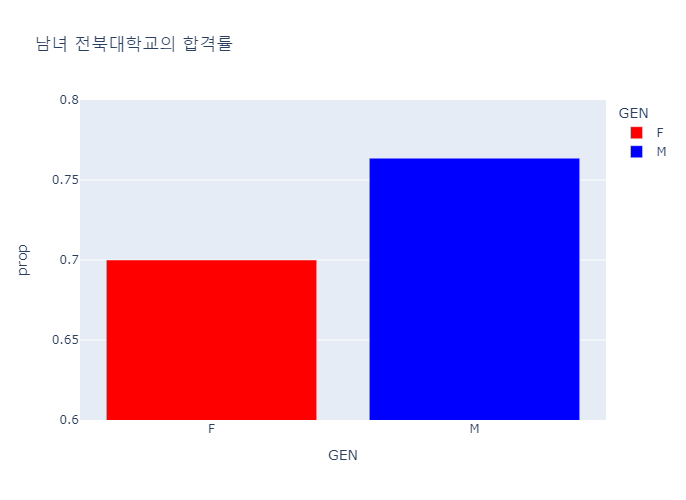

In [68]:
#| code-fold : ture
fig = t_g_c.loc[t_g_c.STATE == "PASS"].\
        plot(x= "GEN", y="prop",kind="bar",
            title="남녀 전북대학교의 합격률",backend= "plotly",color="GEN",
             color_discrete_sequence=["red","blue"],height=500,width=700)
fig.update_yaxes(range=[0.6, 0.8])
fig.show()

`-` 전북대학교는 남녀 불평등인 학교인가?

### 시각화 2 : (학과별, 성별) 합격률 비교

In [69]:
#| code-fold : true
t = df.groupby(["DEP","GEN"],
               as_index=False)[["COUNT"]].sum().\
                rename(columns = {"COUNT":"SUM"}).merge(df)
t["prop"] = t.COUNT/t.SUM
t

DEP GEN  SUM STATE  COUNT  prop
0   A1   F   10  PASS      5  0.50
1   A1   F   10  FAIL      5  0.50
2   A1   M   10  PASS      1  0.10
3   A1   M   10  FAIL      9  0.90
4   A2   F   10  PASS      5  0.50
5   A2   F   10  FAIL      5  0.50
6   A2   M   10  PASS      2  0.20
7   A2   M   10  FAIL      8  0.80
8   B1   F   10  PASS      9  0.90
9   B1   F   10  FAIL      1  0.10
10  B1   M  100  PASS     80  0.80
11  B1   M  100  FAIL     20  0.20
12  B2   F   10  PASS      9  0.90
13  B2   F   10  FAIL      1  0.10
14  B2   M  100  PASS     85  0.85
15  B2   M  100  FAIL     15  0.15

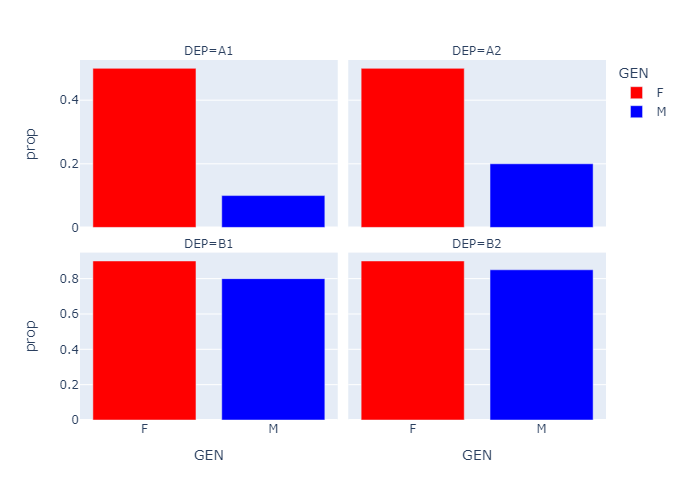

In [70]:
#| code_fold : true
fig = t.loc[t.STATE == "PASS",:].plot(x="GEN", y="prop", kind = "bar",backend = "plotly",
          color= "GEN",color_discrete_sequence = ["red","blue"],
        facet_col="DEP",facet_col_wrap=2,height=500,width=700)

fig.update_yaxes(matches=None)
fig.show()

`-` 실상은 그렇지 않다!

### summary

`-` 어떤 현상에 대해서 설명할 때 단순히 이분법적인 사고로 바라보면 안된다.

* 위 예제처럼 잘못된 오해를 불러올 수 있는 상황이 발생할 수 있지 않은가?

* 실제로 학과별 남녀 합격률을 조사한 결과 `여학생의 비율`이 더 많은 것을 확인했다.

* 이 같은 현상을 `심슨의 역설` 이라고 하며 모델링 과정에서도 굉장히 중요한 부분을 차지한다.